<a href="https://colab.research.google.com/github/RohitPadala/Machine-Learning-For-Safest-Car-Model-Prediction-Based-On-CO2-Emissions/blob/main/MLProjectSDG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**
--------------------------------------------------------------------------------
***Team number: 1***

---
(*In Title case, separated with commas*)
***Full names of all students in the team: Lokesh Aravind Saravanan, Shantanu Wadhwa, Shashank Kumar, Rohit Tulsi Padala***
---
(*Separated by commas*)
***Id number of all students in the team:***
***2021AAPS2906H,2021A3PS2972H,2021A8PS1670H,2021AAPS1896H***


Please refer to the email providing the assignment of project and follow the instructions provided in the project brief.


# **_1. Preprocessing of Dataset_**

### The respective dataset has been shared in the project brief. Please refer to it.

In [ ]:
# Library for handling data and processing numbers
import pandas as pd
import numpy as np
import math

# Libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Reducing warning content
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Description of the content of the data
df = pd.read_csv('/Carbon Emissions.csv')
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
df.shape

(7385, 12)

In [ ]:
df.isnull().values.any()

False

In [ ]:
#Dropping Duplicates
df.drop_duplicates(keep='first',inplace=True)
df.shape

(6282, 12)

In [ ]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


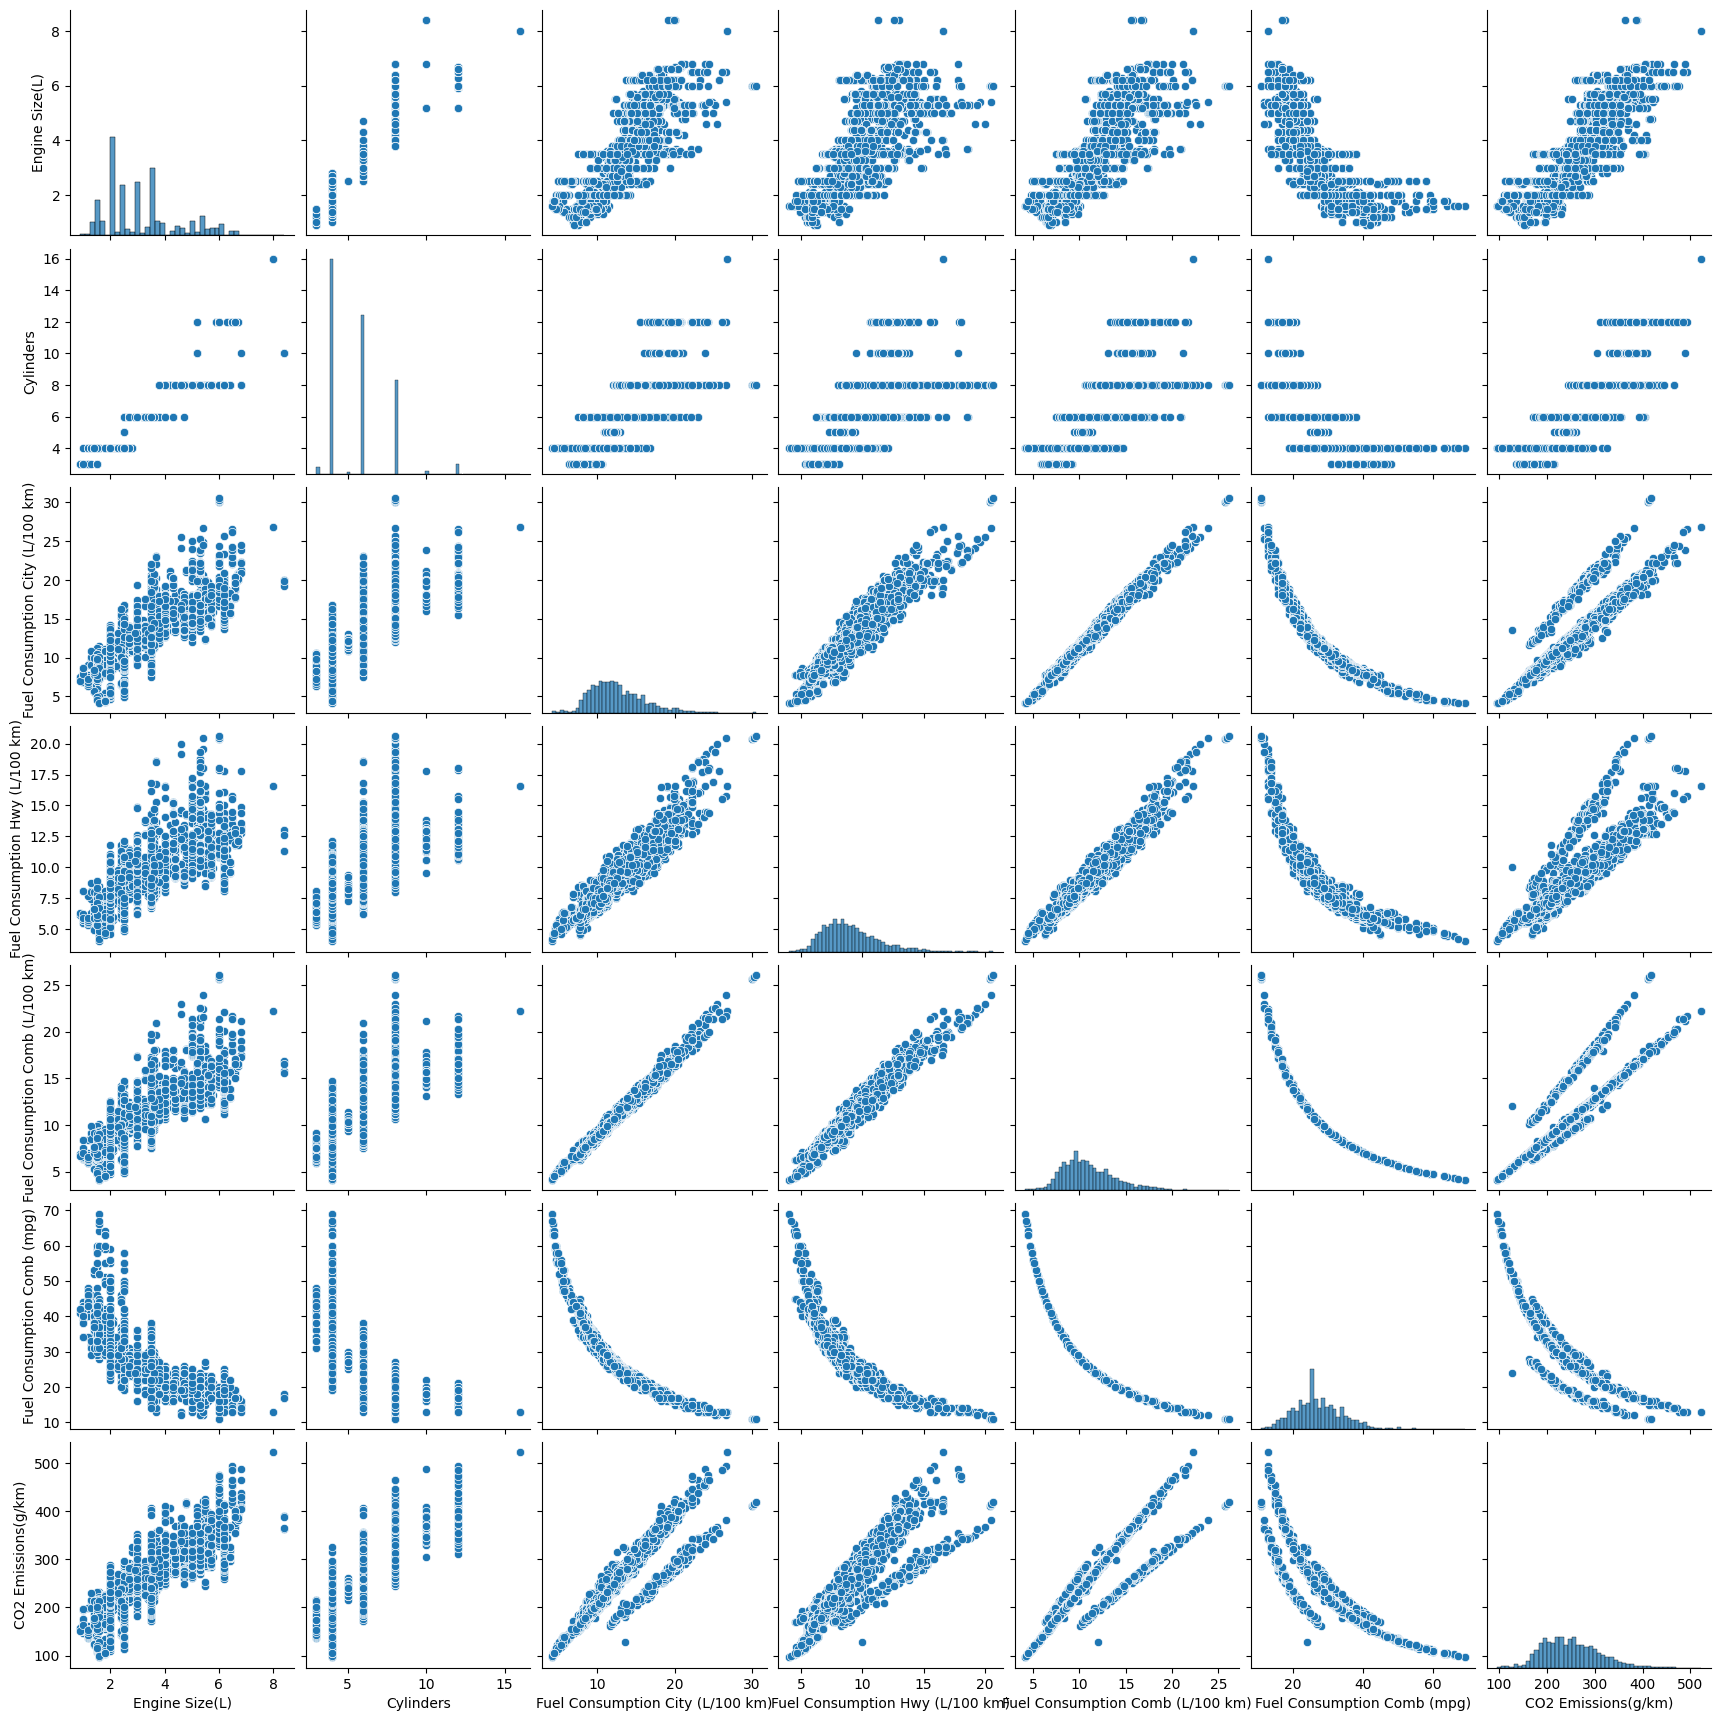

In [ ]:
sns.pairplot(df)

Based on the pairplot above, it is noted that,



1. As engine size increases:
  *   Fuel consumption (L/100km) increases
  *   The number of cylinders increases
2. CO2 Emissions generally increase with increase in all the features with the exception of 'Fuel Consumption Com (mpg)' where there is an inverse non-linear relationship





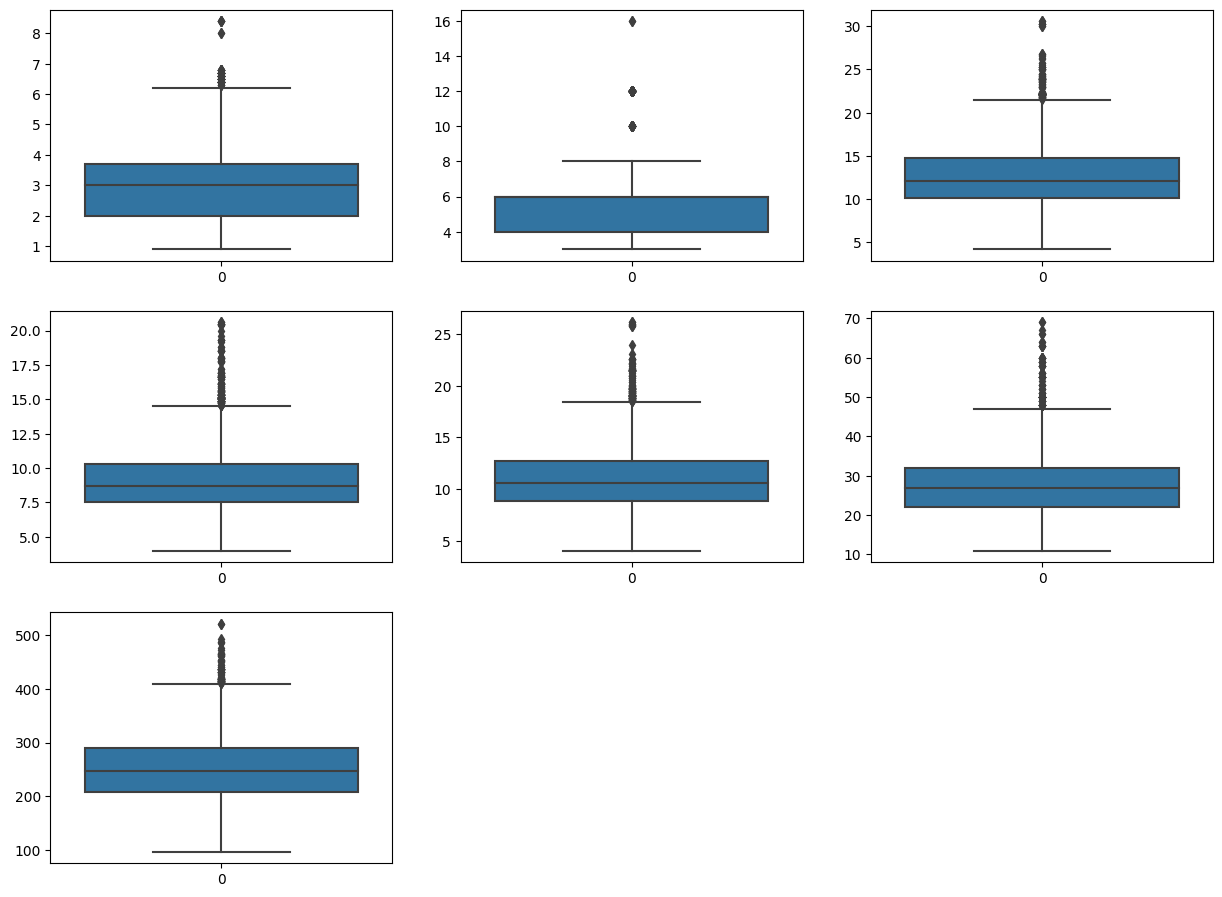

In [ ]:
numeric_columns=['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
j=1
fig = plt.figure(figsize = (15,15))
for i in numeric_columns:
    plt.subplot(4,3,j)
    sns.boxplot(df[i])
    j=j+1

The distribution of values in the various columns indicate the need for scaling features since there are non-uniformly distributed values in a number of the columns

Text(0.5, 1.0, 'Correlation Heatmap')

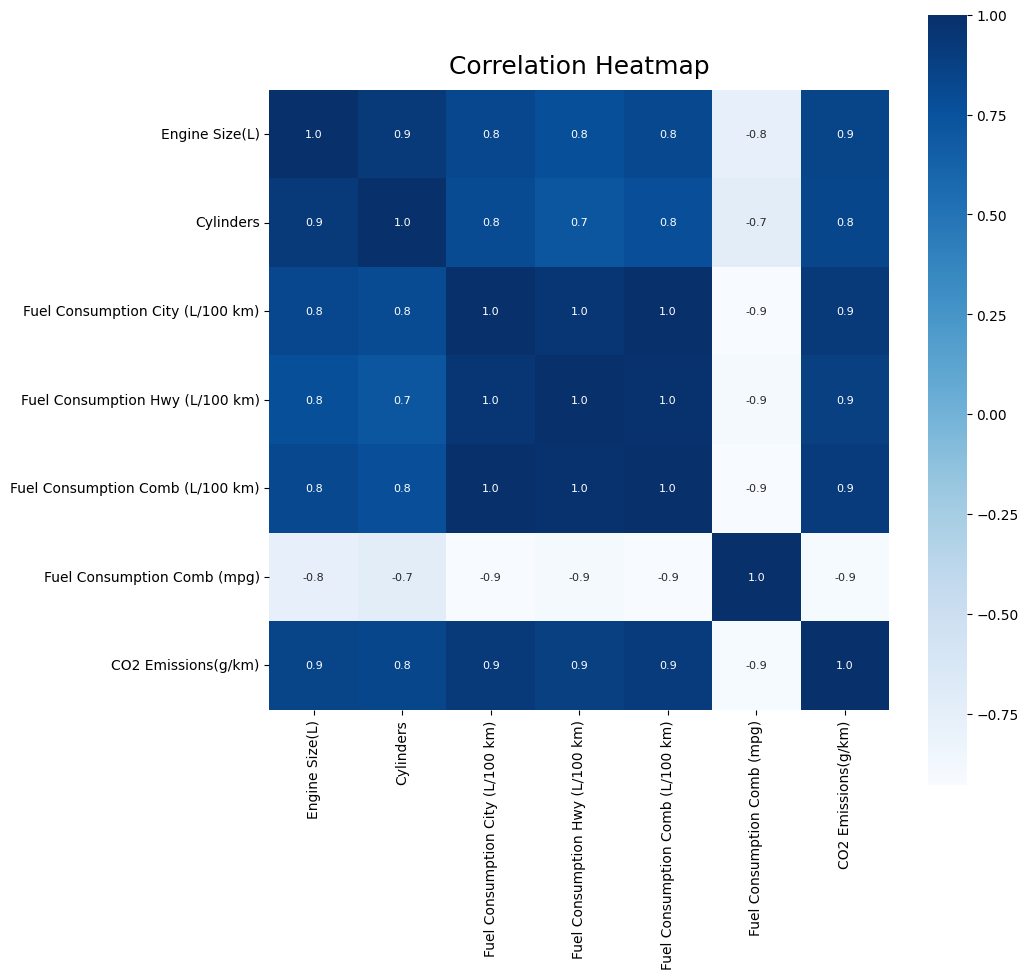

In [ ]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
heatmap=sns.heatmap(df.corr(), cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [ ]:
## Dropping 'Fuel Consumption Hwy (L/100 km)' and 'Fuel Consumption City (L/100 km)'
## because they have perfect correlation with 'Fuel Consumption Comb (L/100 km)'
df.drop(columns=['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)'], inplace=True)

In [ ]:
for i in df.columns:
    print(i,': ',df[i].nunique())
    print("\n")

Make :  42


Model :  2053


Vehicle Class :  16


Engine Size(L) :  51


Cylinders :  8


Transmission :  27


Fuel Type :  5


Fuel Consumption Comb (L/100 km) :  181


Fuel Consumption Comb (mpg) :  54


CO2 Emissions(g/km) :  331




In [ ]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,29,232


In [ ]:
# Encoding only fuel type,vehicle class out of all the non-numeric features
# using pd.get_dummies since the rest contain too many unique values and will increase the feature so much
df.drop(columns=['Make','Model','Transmission'], inplace=True)
fuelType_encoded=pd.get_dummies(df['Fuel Type'],prefix='Fuel',drop_first=False)
vehicleClass_encoded=pd.get_dummies(df['Vehicle Class'],prefix='Vehicle',drop_first=False)
df.drop(columns=['Fuel Type','Vehicle Class'],axis=1,inplace=True)
df_encoded= pd.concat([df,fuelType_encoded,vehicleClass_encoded],axis=1)

In [ ]:
df_encoded

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel_D,Fuel_E,Fuel_N,Fuel_X,Fuel_Z,...,Vehicle_PICKUP TRUCK - STANDARD,Vehicle_SPECIAL PURPOSE VEHICLE,Vehicle_STATION WAGON - MID-SIZE,Vehicle_STATION WAGON - SMALL,Vehicle_SUBCOMPACT,Vehicle_SUV - SMALL,Vehicle_SUV - STANDARD,Vehicle_TWO-SEATER,Vehicle_VAN - CARGO,Vehicle_VAN - PASSENGER
0,2.0,4,8.5,33,196,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2.4,4,9.6,29,221,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.5,4,5.9,48,136,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3.5,6,11.1,25,255,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,3.5,6,10.6,27,244,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,9.4,30,219,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
7381,2.0,4,9.9,29,232,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
7382,2.0,4,10.3,27,240,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
7383,2.0,4,9.9,29,232,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_encoded.drop_duplicates(keep='first',inplace=True)

In [ ]:
df_encoded

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel_D,Fuel_E,Fuel_N,Fuel_X,Fuel_Z,...,Vehicle_PICKUP TRUCK - STANDARD,Vehicle_SPECIAL PURPOSE VEHICLE,Vehicle_STATION WAGON - MID-SIZE,Vehicle_STATION WAGON - SMALL,Vehicle_SUBCOMPACT,Vehicle_SUV - SMALL,Vehicle_SUV - STANDARD,Vehicle_TWO-SEATER,Vehicle_VAN - CARGO,Vehicle_VAN - PASSENGER
0,2.0,4,8.5,33,196,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2.4,4,9.6,29,221,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.5,4,5.9,48,136,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3.5,6,11.1,25,255,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,3.5,6,10.6,27,244,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7378,2.0,4,9.4,30,220,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
7379,2.0,4,9.0,31,210,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
7380,2.0,4,9.4,30,219,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
7383,2.0,4,9.9,29,232,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_encoded = df_encoded.reset_index()
df_encoded = df_encoded.drop(columns = ['index'])
df_fuel = df_encoded.drop(columns=['Cylinders','Engine Size(L)',])
columns_to_drop = [col for col in df_fuel.columns if col.startswith('Vehicle')]

# Drop the identified columns
df_fuel.drop(columns=columns_to_drop, inplace=True)
df_fuel

,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel_D,Fuel_E,Fuel_N,Fuel_X,Fuel_Z
0,8.5,33,196,0,0,0,0,1
1,9.6,29,221,0,0,0,0,1
2,5.9,48,136,0,0,0,0,1
3,11.1,25,255,0,0,0,0,1
4,10.6,27,244,0,0,0,0,1
...,...,...,...,...,...,...,...,...
4056,9.4,30,220,0,0,0,0,1
4057,9.0,31,210,0,0,0,1,0
4058,9.4,30,219,0,0,0,0,1
4059,9.9,29,232,0,0,0,0,1


In [ ]:
X=df_encoded.drop(['CO2 Emissions(g/km)'],axis=1)
X_fuel = df_fuel.drop(['CO2 Emissions(g/km)'],axis=1)
Y=df_encoded['CO2 Emissions(g/km)']

In [ ]:
def classify_emissions(co2_value):
    if co2_value < 220:
        return 'Environment-Friendly'
    elif 220 <= co2_value <= 280:
        return 'Neutral'
    else:
        return 'Dangerous'

classify_emissions_np = np.vectorize(classify_emissions)

In [ ]:
Y_class = df_encoded['CO2 Emissions(g/km)'].apply(classify_emissions)

In [ ]:
Y_class

0       Environment-Friendly
1                    Neutral
2       Environment-Friendly
3                    Neutral
4                    Neutral
                ...         
4056                 Neutral
4057    Environment-Friendly
4058    Environment-Friendly
4059                 Neutral
4060                 Neutral
Name: CO2 Emissions(g/km), Length: 4061, dtype: object

In [ ]:
Y_class.value_counts()

Neutral                 1555
Environment-Friendly    1357
Dangerous               1149
Name: CO2 Emissions(g/km), dtype: int64

In [ ]:
df_train = df_encoded.head(3000)
df_test = df_encoded.iloc[3000:]
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

df_train_fuel = df_fuel.head(3000)
df_test_fuel = df_fuel.iloc[3000:]
df_test_fuel.reset_index(drop=True, inplace=True)
df_train_fuel.reset_index(drop=True, inplace=True)

In [ ]:
X_train=df_train.drop(['CO2 Emissions(g/km)'],axis=1)
Y_train=df_train['CO2 Emissions(g/km)']
X_train_fuel = df_train_fuel.drop(['CO2 Emissions(g/km)'],axis=1)

X_test=df_test.drop(['CO2 Emissions(g/km)'],axis=1)
X_test_fuel = df_test_fuel.drop(['CO2 Emissions(g/km)'],axis=1)
Y_test=df_test['CO2 Emissions(g/km)']

In [ ]:
Y_class_test = Y_class.iloc[3000:]
Y_class_test_np = Y_class_test.values

In [ ]:
def scale_dataframe(df):
    return (df - df.mean()) / df.std()

def getAccuracyNumeric(actual,predicted):
    error=0
    for i in range(len(predicted)):
        error+=abs((actual[i]-predicted[i]))/actual[i]
    error=error*100/len(actual)
    return 100-error


class MyStandardScaler(object):
    def __init__(self):
        pass

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X - self.mean_, axis=0)
        return self

    def transform(self, X):
        return (X - self.mean_) / self.scale_

    def fit_transform(self, X):
        return self.fit(X).transform(X)

def train_test_split_(*arrays, test_size=None, train_size=None, random_state=None):
    length = len(arrays[0])
    if random_state:
        np.random.seed(random_state)
    p = np.random.permutation(length)

    if type(test_size) == int:
        index = length - test_size
    elif type(test_size) == float:
        index = length - np.ceil(length * test_size)
    else:
        if type(train_size) == int:
            index = train_size
        elif type(train_size) == float:
            index = int(length * train_size)
        else:
            index = length - np.ceil(length * 0.25)

    return [b for a in arrays for b in (a[p][:index], a[p][index:])]

In [ ]:
xnp = X_train.to_numpy()
ynp = Y_train.to_numpy()
xtnp = X_test.to_numpy()
ytnp = Y_test.to_numpy()

xnp_fuel = X_train_fuel.to_numpy()
xtnp_fuel = X_test_fuel.to_numpy()


ynp = ynp [:, np.newaxis]
ytnp = ytnp [:, np.newaxis]

# ***2. Random Forest***

In [ ]:
class DecisionNode:
    """
    Class for a parent/leaf node in the decision tree.
    A Node with node information about it's left and right nodes if any. it has the info_gain also.
    """
    def __init__(self, info_gain=None, question=None, feature_index=None, threshold=None,
                 true_subtree=None, false_subtree=None):
        """
        :param
        """
        self.info_gain = info_gain
        # Which question to ask , to split the dataset.
        self.question = question
        # Index of the feature which make the best fit for this node.
        self.feature_index = feature_index
        # The threshold value for that feature to make the split.
        self.threshold = threshold
        # DecisionNode Object of the left subtree.
        self.true_left_subtree = true_subtree
        # DecisionNode Object of the right subtree.
        self.false_right_subtree = false_subtree

class LeafNode:
    """ Leaf Node of the decision tree."""
    def __init__(self, value):
        self.prediction_value = value

class DecisionTree:
    """Common class for making decision tree for classification and regression tasks."""
    def __init__(self, min_sample_split=3, min_info_gain=1e-7, max_depth=float('inf'),
                 info_gain_function=None, leaf_node_calculation=None):
        """
        """
        self.root = None

        self.min_sample_split = min_sample_split
        self.min_info_gain = min_info_gain
        self.max_depth = max_depth
        self.info_gain_function = info_gain_function
        self.leaf_node_calculation = leaf_node_calculation

    def _partition_dataset(self, Xy, feature_index, threshold):
        """Split the dataset based on the given feature and threshold.

        """
        split_func = None
        if isinstance(threshold, int) or isinstance(threshold, float):
            split_func = lambda sample: sample[feature_index] >= threshold
        else:
            split_func = lambda sample: sample[feature_index] == threshold

        X_1 = np.array([sample for sample in Xy if split_func(sample)])
        X_2 = np.array([sample for sample in Xy if not split_func(sample)])

        return X_1, X_2

    def _find_best_split(self, Xy):
        """ Find the best question/best feature threshold which splits the data well.

        """
        best_question = tuple() # this will contain the feature and its value which make the best split(higest gain).
        best_datasplit = {} # best data split.
        largest_info_gain = 0
        n_features = (Xy.shape[1] - 1)
        # iterate over all the features.
        for feature_index in range(n_features):
            # find the unique values in that feature.
            unique_value = set(s for s in Xy[:,feature_index])
            # iterate over all the unique values to find the info_gain.
            for threshold in unique_value:
                # split the dataset based on the feature value.
                true_xy, false_xy = self._partition_dataset(Xy, feature_index, threshold)
                # skip the node which has any on type 0. because this means it is already pure.
                if len(true_xy) > 0 and len(false_xy) > 0:


                    # find the y values.
                    y = Xy[:, -1]
                    true_y = true_xy[:, -1]
                    false_y = false_xy[:, -1]

                    # calculate the info_gain function.
                    info_gain = self.info_gain_function(y, true_y, false_y)

                    # if the calculated info_gain is larger than save this value for comparision.
                    if info_gain > largest_info_gain:
                        largest_info_gain = info_gain
                        best_question = (feature_index, threshold)
                        best_datasplit = {
                                    "leftX": true_xy[:, :n_features],   # X of left subtree
                                    "lefty": true_xy[:, n_features:],   # y of left subtree
                                    "rightX": false_xy[:, :n_features],  # X of right subtree
                                    "righty": false_xy[:, n_features:]   # y of right subtree
                        }

        return largest_info_gain, best_question, best_datasplit

    def _build_tree(self, X, y, current_depth=0):
        """
        This is a recursive method to build the decision tree.
        """
        n_samples , n_features = X.shape
        # Add y as last column of X
        Xy = np.concatenate((X, y), axis=1)
        # find the Information gain on each feature each values and return the question which splits the data very well
        # based on the info_gain function. (classfication - Information gain, regression - variance reduction).
        if (n_samples >= self.min_sample_split) and (current_depth <= self.max_depth):
            # find the best split/ which question split the data well.
            info_gain, question, best_datasplit = self._find_best_split(Xy)
            if info_gain > self.min_info_gain:
            # Build subtrees for the right and left branch.
                true_branch = self._build_tree(best_datasplit["leftX"], best_datasplit["lefty"], current_depth + 1)
                false_branch = self._build_tree(best_datasplit["rightX"], best_datasplit["righty"], current_depth + 1)
                return DecisionNode( info_gain=info_gain, question=question, feature_index=question[0], threshold=question[1],
                                    true_subtree=true_branch, false_subtree=false_branch)

        leaf_value = self._leaf_value_calculation(y)
        return LeafNode(value=leaf_value)


    def train(self, X, y):
        """
        Build the decision tree.
        param X: Train features/dependant values.
        param y: train target/independant value.
        """
        self.root = self._build_tree(X, y, current_depth=0)

    def predict_sample(self, x, tree=None):
        """move form the top to bottom of the tree make a prediction of the sample by the
            value in the leaf node """
        if tree is None:
            tree = self.root
        # if it a leaf node the return the prediction.
        if isinstance(tree , LeafNode):
            return tree.prediction_value

        feature_value = x[tree.feature_index]

        branch = tree.false_right_subtree

        if isinstance(feature_value, int) or isinstance(feature_value, float):

            if feature_value >= tree.threshold:
                branch = tree.true_left_subtree

        elif feature_value == tree.threshold:
            branch = tree.true_left_subtree

        return self.predict_sample(x, branch)

    def predict(self, test_X):
        """ predict the unknow feature."""
        x = np.array(test_X)
        y_pred = [self.predict_sample(sample) for sample in x]
        # y_pred = np.array(y_pred)
        # y_pred = np.expand_dims(y_pred, axis = 1)
        return y_pred


class DecisionTreeClassifier(DecisionTree):
    """ Decision Tree for the classification problem."""
    def __init__(self, min_sample_split=3, min_info_gain=1e-7, max_depth=float('inf')):
        """
        :param min_sample_split: min value a leaf node must have.
        :param min_info_gain: minimum info_gain.
        :param max_depth: maximum depth of the tree.
        """
        self._info_gain_function = self._calculate_information_gain
        self._leaf_value_calculation = self._calculate_majority_class
        super(DecisionTreeClassifier, self).__init__(
            min_sample_split=min_sample_split,
            min_info_gain=min_info_gain,
            max_depth=max_depth,
            info_gain_function=self._info_gain_function,
            leaf_node_calculation=self._leaf_value_calculation)

    def _entropy(self, y):
        """ Find the entropy for the given data"""
        entropy = 0
        unique_value = np.unique(y)
        for val in unique_value:
            # probability of that class.
            p = len(y[y==val]) / len(y)
            entropy += -p * (math.log(p) / math.log(2))
        return entropy


    def _calculate_information_gain(self, y, y1, y2):
        """
        Calculate the information gain.

        :param y: target value.
        :param y1: target value for dataset in the true split/left branch.
        :param y2: target value for dataset in the false split/right branch.
        """
        # probability of true values.
        p = len(y1) / len(y)
        entropy = self._entropy(y)
        info_gain = entropy - p * self._entropy(y1) - (1 - p) * self._entropy(y2)
        return info_gain

    def _calculate_majority_class(self, y):
        """
        calculate the prediction value for that leaf node.

        :param y: leaf node target array.
        """
        most_frequent_label = None
        max_count = 0
        unique_labels = np.unique(y)
        # iterate over all the unique values and find their frequentcy count.
        for label in unique_labels:
            count = len( y[y == label])
            if count > max_count:
                most_frequent_label = label
                max_count = count
        return most_frequent_label

    def train(self, X, y):
        """
        Build the tree.

        :param X: Feature array/depentant values.
        :parma y: target array/indepentant values.
        """
        # train the model.
        super(DecisionTreeClassifier, self).train(X, y)

    def predict(self, test_X):
        """ predict the unknow feature."""
        y_pred = super(DecisionTreeClassifier, self).predict(test_X)
        y_pred = np.array(y_pred)
        y_pred = np.expand_dims(y_pred, axis = 1)
        return y_pred


class DecisionTreeRegression(DecisionTree):
    """ Decision Tree for the classification problem."""
    def __init__(self, min_sample_split=3, min_info_gain=1e-7, max_depth=float('inf'),
                 ):
        """
        :param min_sample_split: min value a leaf node must have.
        :param min_info_gain: minimum info_gain.
        :param max_depth: maximum depth of the tree.
        """
        self._info_gain_function = self._calculate_variance_reduction
        self._leaf_value_calculation = self._calculate_column_mean
        super(DecisionTreeRegression, self).__init__(min_sample_split=min_sample_split, min_info_gain=min_info_gain, max_depth=max_depth,
                         info_gain_function=self._info_gain_function, leaf_node_calculation=self._leaf_value_calculation)


    def _calculate_variance_reduction(self, y, y1, y2):
        """
        Calculate the Variance reduction.

        :param y: target value.
        :param y1: target value for dataset in the true split/right branch.
        :param y2: target value for dataset in the false split/left branch.
        """
        # propobility of true values.
        variance = np.var(y)
        variance_y1 = np.var(y1)
        variance_y2 = np.var(y2)

        y_len = len(y)
        fraction_1 = len(y1) / y_len
        fraction_2 = len(y2) / y_len
        variance_reduction = variance - (fraction_1 * variance_y1 + fraction_2 * variance_y2)
        return  variance_reduction

    def _calculate_column_mean(self, y):
        """
        calculate the prediction value for that leaf node using mean.

        :param y: leaf node target array.
        """
        mean = np.mean(y, axis=0)
        return mean

    def train(self, X, y):
        """
        Build the tree.

        :param X: Feature array/depentant values.
        :parma y: target array/indepentant values.
        """
        # train the model.
        super(DecisionTreeRegression, self).train(X, y)

In [ ]:
class RandomForest:
    """    Random forest common class.    """
    def __init__(self, trees, n_trees, max_feature ,
                 prediction_aggrigation_calculation):
        """
        :param trees: List - list of tree objects. classification tree/regression trees.
        :param n_trees: int - How may estimators/tree should be used for random forest building.
        :param max_feature: Int - How many features can be used for a tree from the whole features.
        :param prediction_aggrigation_calculation: Function - Aggication function to find the prediction.
        """
        self.n_estimators = n_trees
        self.max_features = max_feature
        self.tree_feature_indexes = []
        self.prediction_aggrigation_calculation = prediction_aggrigation_calculation
        # Initialize the trees.
        self.trees = trees

    def _make_random_subset(self, X, y, n_subsets, replacement=True):
        """
        Creata a random subset of dataset with/without replacement.

        :param X: Depentand variables.
        :param y: Indepentant variable.
        :param n_subsets: Number of subset we need.
        :param replacement: Boolean - Can we use the data sample again or not.
        """
        subset = []
        # use 100% of data when replacement is true , use 50% otherwise.
        sample_size = (X.shape[0] if replacement else (X.shape[0] // 2))

        # First concadinate the X and y datasets in order to make a choice.
        Xy = np.concatenate((X, y), axis=1)
        np.random.shuffle(Xy)
        # Select random subset of data with replacement.
        for i in range(n_subsets):
            index = np.random.choice(range(sample_size), size=np.shape(range(sample_size)), replace=replacement)
            X = Xy[index][:, :-1]
            y = Xy[index][: , -1]
            subset.append({"X" : X, "y": y})
        return subset

    def train(self, X, y):
        """
        Build the model.
        :param X: Depentand variables.
        :param y: Indepentant variable.
        """
        # if the max_features is not given then select it as square root of no on feature availabe.
        n_features = X.shape[1]
        if self.max_features == None:
            self.max_features = int(math.sqrt(n_features))

        # Split the dataset into number of subsets equal to n_estimators.
        subsets = self._make_random_subset(X, y, self.n_estimators)

        for i, subset in enumerate(subsets):
            X_subset , y_subset = subset["X"], subset["y"]
            # select a random subset of features for each tree. This is called feature bagging.
            idx = np.random.choice(range(n_features), size=self.max_features, replace=True)
            # track this for prediction.
            self.tree_feature_indexes.append(idx)
            # Get the X with the selected features only.
            X_subset = X_subset[:, idx]

            # change the y_subset to 1 dimentional array.
            y_subset = np.expand_dims(y_subset, axis =1)
            # build the model with selected features and selected random subset from dataset.
            self.trees[i].train(X_subset, y_subset)

    def predict(self, test_X):
        """
        Predict the new samples.

        :param test_X: Dependent variables for prediction.
        """
        # predict each sample one by one.
        y_preds = np.empty((test_X.shape[0], self.n_estimators))
        # find the prediction from each tree for eeach samples
        for i, tree in enumerate(self.trees):
            features_index = self.tree_feature_indexes[i]
            X_selected_features = test_X[:, features_index]
            if isinstance(tree, DecisionTreeClassifier):
                y_preds[:, i] = tree.predict(X_selected_features).reshape((-1,))
            else:
                y_preds[:, i] = tree.predict(X_selected_features)
        # find the arrgrecated output.
        y_pred = self.prediction_aggrigation_calculation(y_preds)

        return y_pred


In [ ]:
class RandomForestRegression(RandomForest):
    """Rnadom forest for classification task."""
    def __init__(self, max_feature, max_depth, n_trees=100, min_sample_split=2, min_info_gain=1e-7):
        """
        :param max_depth: Int - Max depth of each tree.
        :param n_trees: Int - Number of trees/estimetors.
        :param min_sample_split: Int - minimum samples for a node to have before going for split.
        :param min_info_gain: Int - Min info_gain a node can have.
        """
        self.prediction_aggrigation_calculation = self._mean_calculation

        # Initializing the trees.
        self.trees = []
        for _ in range(n_trees):
            self.trees.append(DecisionTreeRegression(min_sample_split=min_sample_split,
                                                     min_info_gain=min_info_gain, max_depth=max_depth))

        super().__init__(trees=self.trees, n_trees=n_trees,max_feature=max_feature,
                         prediction_aggrigation_calculation=self.prediction_aggrigation_calculation)

    def _mean_calculation(self, y_preds):
        """
        Find mean prediction of all tree prediction for each sampple.

        :param y_preds: Prediction value from number of estimators trees.
        """
        # create a empty array to store the prediction.
        y_pred = np.empty((y_preds.shape[0], 1))
        # iterate over all the data samples.
        for i, sample_predictions in enumerate(y_preds):
            y_pred[i] = np.mean(sample_predictions)

        return y_pred

In [ ]:
random_forest_reg = RandomForestRegression(n_trees=20, max_feature=20, min_sample_split=2, max_depth=45)
random_forest_reg.train(xnp, ynp)

In [ ]:
y_pred = random_forest_reg.predict(xtnp)

In [ ]:
#print(y_pred)
score = getAccuracyNumeric(ytnp , y_pred)

In [ ]:
#score

In [ ]:
y_pred_class = classify_emissions_np(y_pred)
y_pred_class = y_pred_class.T

accuracy = np.mean(Y_class_test_np == y_pred_class)

# Display the accuracy
print("Classification Accuracy:", accuracy)

Classification Accuracy: 0.943449575871819


In [ ]:
random_forest_reg_fuel = RandomForestRegression(n_trees=20, max_feature=20, min_sample_split=2, max_depth=45)
random_forest_reg_fuel.train(xnp_fuel, ynp)

y_pred_fuel = random_forest_reg_fuel.predict(xtnp_fuel)

score_fuel = getAccuracyNumeric(ytnp,y_pred_fuel)
print("Accuracy with only fuel")
print(score_fuel[0])

Accuracy with only fuel
99.05146971939341


# ***3. ANN***



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statistics import mean
from typing import Dict, List, Tuple

In [ ]:
class Neural:

    def __init__(self, layers: List[int], epochs: int,
                 learning_rate: float = 0.001, batch_size: int=32,
                 validation_split: float = 0.2, verbose: int=1):
        self._layer_structure: List[int] = layers
        self._batch_size: int = batch_size
        self._epochs: int = epochs
        self._learning_rate: float = learning_rate
        self._validation_split: float = validation_split
        self._verbose: int = verbose
        self._losses: Dict[str, float] = {"train": [], "validation": []}
        self._is_fit: bool = False
        self.__layers = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        # validation split
        X, X_val, y, y_val = train_test_split(X, y, test_size=self._validation_split, random_state=42)
        # initialization of layers
        self.__layers = self.__init_layers()
        for epoch in range(self._epochs):
            epoch_losses = []
            for i in range(1, len(self.__layers)):
                # forward pass
                x_batch = X[i:(i+self._batch_size)]
                y_batch = y[i:(i+self._batch_size)]
                pred, hidden = self.__forward(x_batch)
                # calculate loss
                loss = self.__calculate_loss(y_batch, pred)
                epoch_losses.append(np.mean(loss ** 2))
                #backward
                self.__backward(hidden, loss)
            valid_preds, _ = self.__forward(X_val)
            train_loss = mean(epoch_losses)
            valid_loss = np.mean(self.__calculate_mse(valid_preds,y_val))
            self._losses["train"].append(train_loss)
            self._losses["validation"].append(valid_loss)
            #if self._verbose:
                #print(f"Epoch: {epoch} Train MSE: {train_loss} Valid MSE: {valid_loss}")
        self._is_fit = True
        return

    def predict(self, X: np.ndarray) -> np.ndarray:
        if self._is_fit == False:
            raise Exception("Model has not been trained yet.")
        pred, hidden = self.__forward(X)
        return pred

    def plot_learning(self) -> None:
        plt.plot(self._losses["train"],label="loss")
        plt.plot(self._losses["validation"],label="validation")
        plt.legend()

    def __init_layers(self) -> List[np.ndarray]:
        layers = []
        for i in range(1, len(self._layer_structure)):
            layers.append([
                np.random.rand(self._layer_structure[i-1], self._layer_structure[i]) / 5 - .1,
                np.ones((1,self._layer_structure[i]))
            ])
        return layers

    def __forward(self, batch: np.ndarray) -> Tuple[np.ndarray, List[np.ndarray]]:
        hidden = [batch.copy()]
        for i in range(len(self.__layers)):
            batch = np.matmul(batch, self.__layers[i][0]) + self.__layers[i][1]
            if i < len(self.__layers) - 1:
                batch = np.maximum(batch, 0)
            # Store the forward pass hidden values for use in backprop
            hidden.append(batch.copy())
        return batch, hidden

    def __calculate_loss(self,actual: np.ndarray, predicted: np.ndarray) -> np.ndarray:
        "mse"
        return predicted - actual


    def __calculate_mse(self, actual: np.ndarray, predicted: np.ndarray) -> np.ndarray:
        return (actual - predicted) ** 2

    def __backward(self, hidden: List[np.ndarray], grad: np.ndarray) -> None:
        for i in range(len(self.__layers)-1, -1, -1):
            if i != len(self.__layers) - 1:
                grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))

            w_grad = hidden[i].T @ grad
            b_grad = np.mean(grad, axis=0)

            self.__layers[i][0] -= w_grad * self._learning_rate
            self.__layers[i][1] -= b_grad * self._learning_rate

            grad = grad @ self.__layers[i][0].T
        return

(3000, 25)


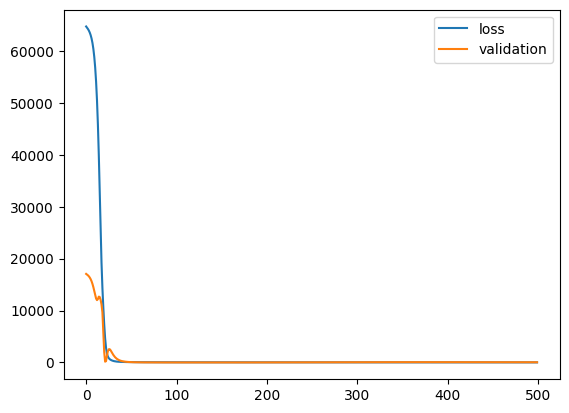

In [ ]:

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)
X_train_std_fuel = scaler.fit_transform(X_train_fuel)
X_test_std_fuel = scaler.fit_transform(X_test_fuel)

y_train = Y_train.to_numpy().reshape(-1,1)
y_test = Y_test.to_numpy().reshape(-1,1)
print(X_train_std.shape)
layer_structure = [X_train_std.shape[1],10,10,1]
nn = Neural(layer_structure, 500, 1e-7, 1000, 0.000001, 1)

nn.fit(X_train_std, y_train)

y_pred = nn.predict(X_test_std)
nn.plot_learning()
#print(y_pred)
#print(y_test)

In [ ]:
score = getAccuracyNumeric(y_test , y_pred)
print(score)

[96.47073524]


In [ ]:
y_pred_class = classify_emissions_np(y_pred)
y_pred_class = y_pred_class.T

accuracy = np.mean(Y_class_test_np == y_pred_class)

# Display the accuracy
print("Classification Accuracy:", accuracy)

Classification Accuracy: 0.8934967012252591


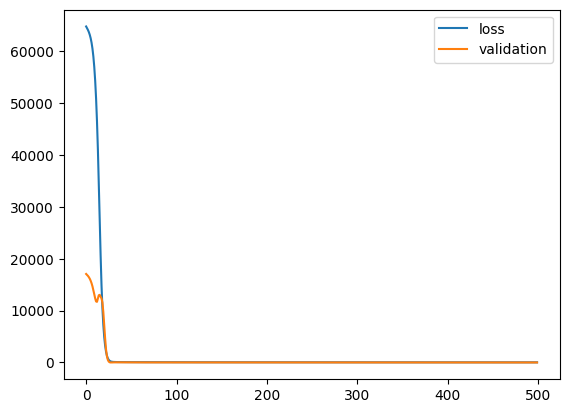

In [ ]:
layer_structure_fuel = [X_train_std_fuel.shape[1],10,10,1]
nn_fuel = Neural(layer_structure_fuel, 500, 1e-7, 1000, 0.000001, 1)
nn_fuel.fit(X_train_std_fuel, y_train)

y_pred_fuel = nn_fuel.predict(X_test_std_fuel)
nn_fuel.plot_learning()

In [ ]:
score_fuel = getAccuracyNumeric(y_test , y_pred_fuel)
print("Accuracy using only fuel")
print(score_fuel)

# ***4. XGBoost (Based on Reasearch Litereature)***

In [ ]:
import numpy as np
import pandas as pd

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values

        self.tree = self._fit(X, y, depth=0)

    def _fit(self, X, y, depth):
        if len(np.unique(y)) == 1 or depth == self.max_depth:
            return np.mean(y)

        # Find the best split
        num_features = X.shape[1]
        best_feature, best_threshold = None, None
        best_mse = float('inf')

        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask
                mse = self._calculate_mse(y[left_mask]) + self._calculate_mse(y[right_mask])

                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = threshold

        # Split the data
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask

        # Ensure that the left and right subtrees receive 2D arrays
        left_subtree = self._fit(X[left_mask], y[left_mask], depth + 1) if np.any(left_mask) else np.mean(y)
        right_subtree = self._fit(X[right_mask], y[right_mask], depth + 1) if np.any(right_mask) else np.mean(y)

        return (best_feature, best_threshold, left_subtree, right_subtree)



    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values

        return np.array([self._predict(x, self.tree) for x in X])

    def _predict(self, x, node):
        if isinstance(node, float):
            return node
        feature, threshold, left_subtree, right_subtree = node
        if x[feature] <= threshold:
            return self._predict(x, left_subtree)
        else:
            return self._predict(x, right_subtree)

    def _calculate_mse(self, y):
        if len(y) == 0:
            return 0
        return np.mean((y - np.mean(y))**2)


class XGBoost:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []

    def fit(self, X, y):
        residuals = y.copy()

        for _ in range(self.n_estimators):
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X, residuals)

            predictions = tree.predict(X)
            residuals -= self.learning_rate * predictions

            self.models.append(tree)

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values

        predictions = np.zeros(X.shape[0])
        for tree in self.models:
            predictions += self.learning_rate * tree.predict(X)
        return predictions


# Now, let's calculate the accuracy (you can use other metrics for regression problems).

def calculate_accuracy(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Example usage:
# You have your training data X_train, y_train and test data X_test.
# Also, you want to predict a continuous variable.

# Instantiate the XGBoost
xgb_model = XGBoost(n_estimators=300, learning_rate=0.5, max_depth=8)

# Train the model
xgb_model.fit(X_train, Y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate Mean Squared Error (MSE) as an example of regression accuracy
mse = calculate_accuracy(Y_test, y_pred)

In [ ]:
y_pred_class = classify_emissions_np(y_pred)
y_pred_class = y_pred_class.T

accuracy = np.mean(Y_class_test_np == y_pred_class)

# Display the accuracy
print("Classification Accuracy:", accuracy)

Classification Accuracy: 0.7342130065975495


In [ ]:
xgb_model_fuel = XGBoost(n_estimators=300, learning_rate=0.5, max_depth=8)

# Train the model
xgb_model_fuel.fit(X_train_fuel, Y_train)

# Make predictions
y_pred_fuel = xgb_model_fuel.predict(X_test_fuel)

# Calculate Mean Squared Error (MSE) as an example of regression accuracy
mse = calculate_accuracy(Y_test, y_pred_fuel)
print("Error and Accuracy using only fuel")
#print(f"Accuracy: {mse}")
print(getAccuracyNumeric(Y_test,y_pred_fuel))

Error and Accuracy using only fuel
89.35297485773349


# ***5. KNN (Based on research literature)***

In [ ]:
# Function to return the list of distances of the test records from train records
def distNeighbours(X_train,Y_train,X_test,K):
    distance=[]
    for i in range(len(X_train)):
        eDistance=0
        for j in range(len(X_train.columns)):
                eDistance+=round(np.sqrt(pow((X_train.iloc[i,j]-X_test[j]),2)),2)
        distance.append((eDistance,Y_train.iloc[i]))
        distance=sorted(distance, key=lambda x: x[0])[0:K]
    return distance

# Predict the output of the variables based on K nearest neighbours
# Output is the mean of the K nearest neighbours
def predictOutputNumeric(X_train,Y_train,X_test,K):
    neighbours=[]
    responses=[]
    for i in range(len(X_test)):
        neighbours.append(distNeighbours(X_train,Y_train,X_test.iloc[i,:],K))
    for i in neighbours:
        mean=0
        for j in i:
            mean+=j[-1]
        mean=mean/K
        responses.append(mean)
    return responses

# Accuarcy of the predictions
def getAccuracyNumeric(actual,predicted):
    error=0
    for i in range(len(predicted)):
        error+=abs((actual[i]-predicted[i]))/actual[i]
    error=error*100/len(actual)
    return 100-error

In [ ]:
output=predictOutputNumeric(X_train,Y_train,X_test,3)

In [ ]:
print('Accuracy from the code: {:^0.2f}'.format(getAccuracyNumeric(Y_test,output),2))

Accuracy from the code: 98.56


In [ ]:
y_pred_class = classify_emissions_np(output)
y_pred_class = y_pred_class.T

accuracy = np.mean(Y_class_test_np == y_pred_class)

# Display the accuracy
print("Classification Accuracy:", accuracy)

In [ ]:
print("Accuracy using only fuel")
output_fuel = predictOutputNumeric(X_train_fuel,Y_train,X_test_fuel,3)
print('Accuracy from the code: {:^0.2f}'.format(getAccuracyNumeric(Y_test,output_fuel),2))

Accuracy using only fuel
Accuracy from the code: 98.21


# ***6. Comparison of insights drawn from the models***

## Safest Car Model

We are choosing Random Forest here because it is our most Accurate model

In [ ]:
random_forest_reg = RandomForestRegression(n_trees=20, max_feature=20, min_sample_split=2, max_depth=45)
random_forest_reg.train(xnp, ynp)

y_pred = random_forest_reg.predict(xtnp)

In [ ]:
minIndex = np.argmin(y_pred)

X_test.iloc[minIndex]

Engine Size(L)                       1.8
Cylinders                            4.0
Fuel Consumption Comb (L/100 km)     4.4
Fuel Consumption Comb (mpg)         64.0
Fuel_D                               0.0
Fuel_E                               0.0
Fuel_N                               0.0
Fuel_X                               1.0
Fuel_Z                               0.0
Vehicle_COMPACT                      0.0
Vehicle_FULL-SIZE                    0.0
Vehicle_MID-SIZE                     1.0
Vehicle_MINICOMPACT                  0.0
Vehicle_MINIVAN                      0.0
Vehicle_PICKUP TRUCK - SMALL         0.0
Vehicle_PICKUP TRUCK - STANDARD      0.0
Vehicle_SPECIAL PURPOSE VEHICLE      0.0
Vehicle_STATION WAGON - MID-SIZE     0.0
Vehicle_STATION WAGON - SMALL        0.0
Vehicle_SUBCOMPACT                   0.0
Vehicle_SUV - SMALL                  0.0
Vehicle_SUV - STANDARD               0.0
Vehicle_TWO-SEATER                   0.0
Vehicle_VAN - CARGO                  0.0
Vehicle_VAN - PA

In [ ]:
y_pred[minIndex]

array([117.79601235])

From our predictions, we got the CO2 emmision to be 112 g/km

The safest car features are:
*   Cylinders = 4
*   Fuel Consumption Comb (L/100 km) = 5.6
*   Fuel type = X
*   Vehicle Type = Compact







## Insights

### K Nearest Neighbours

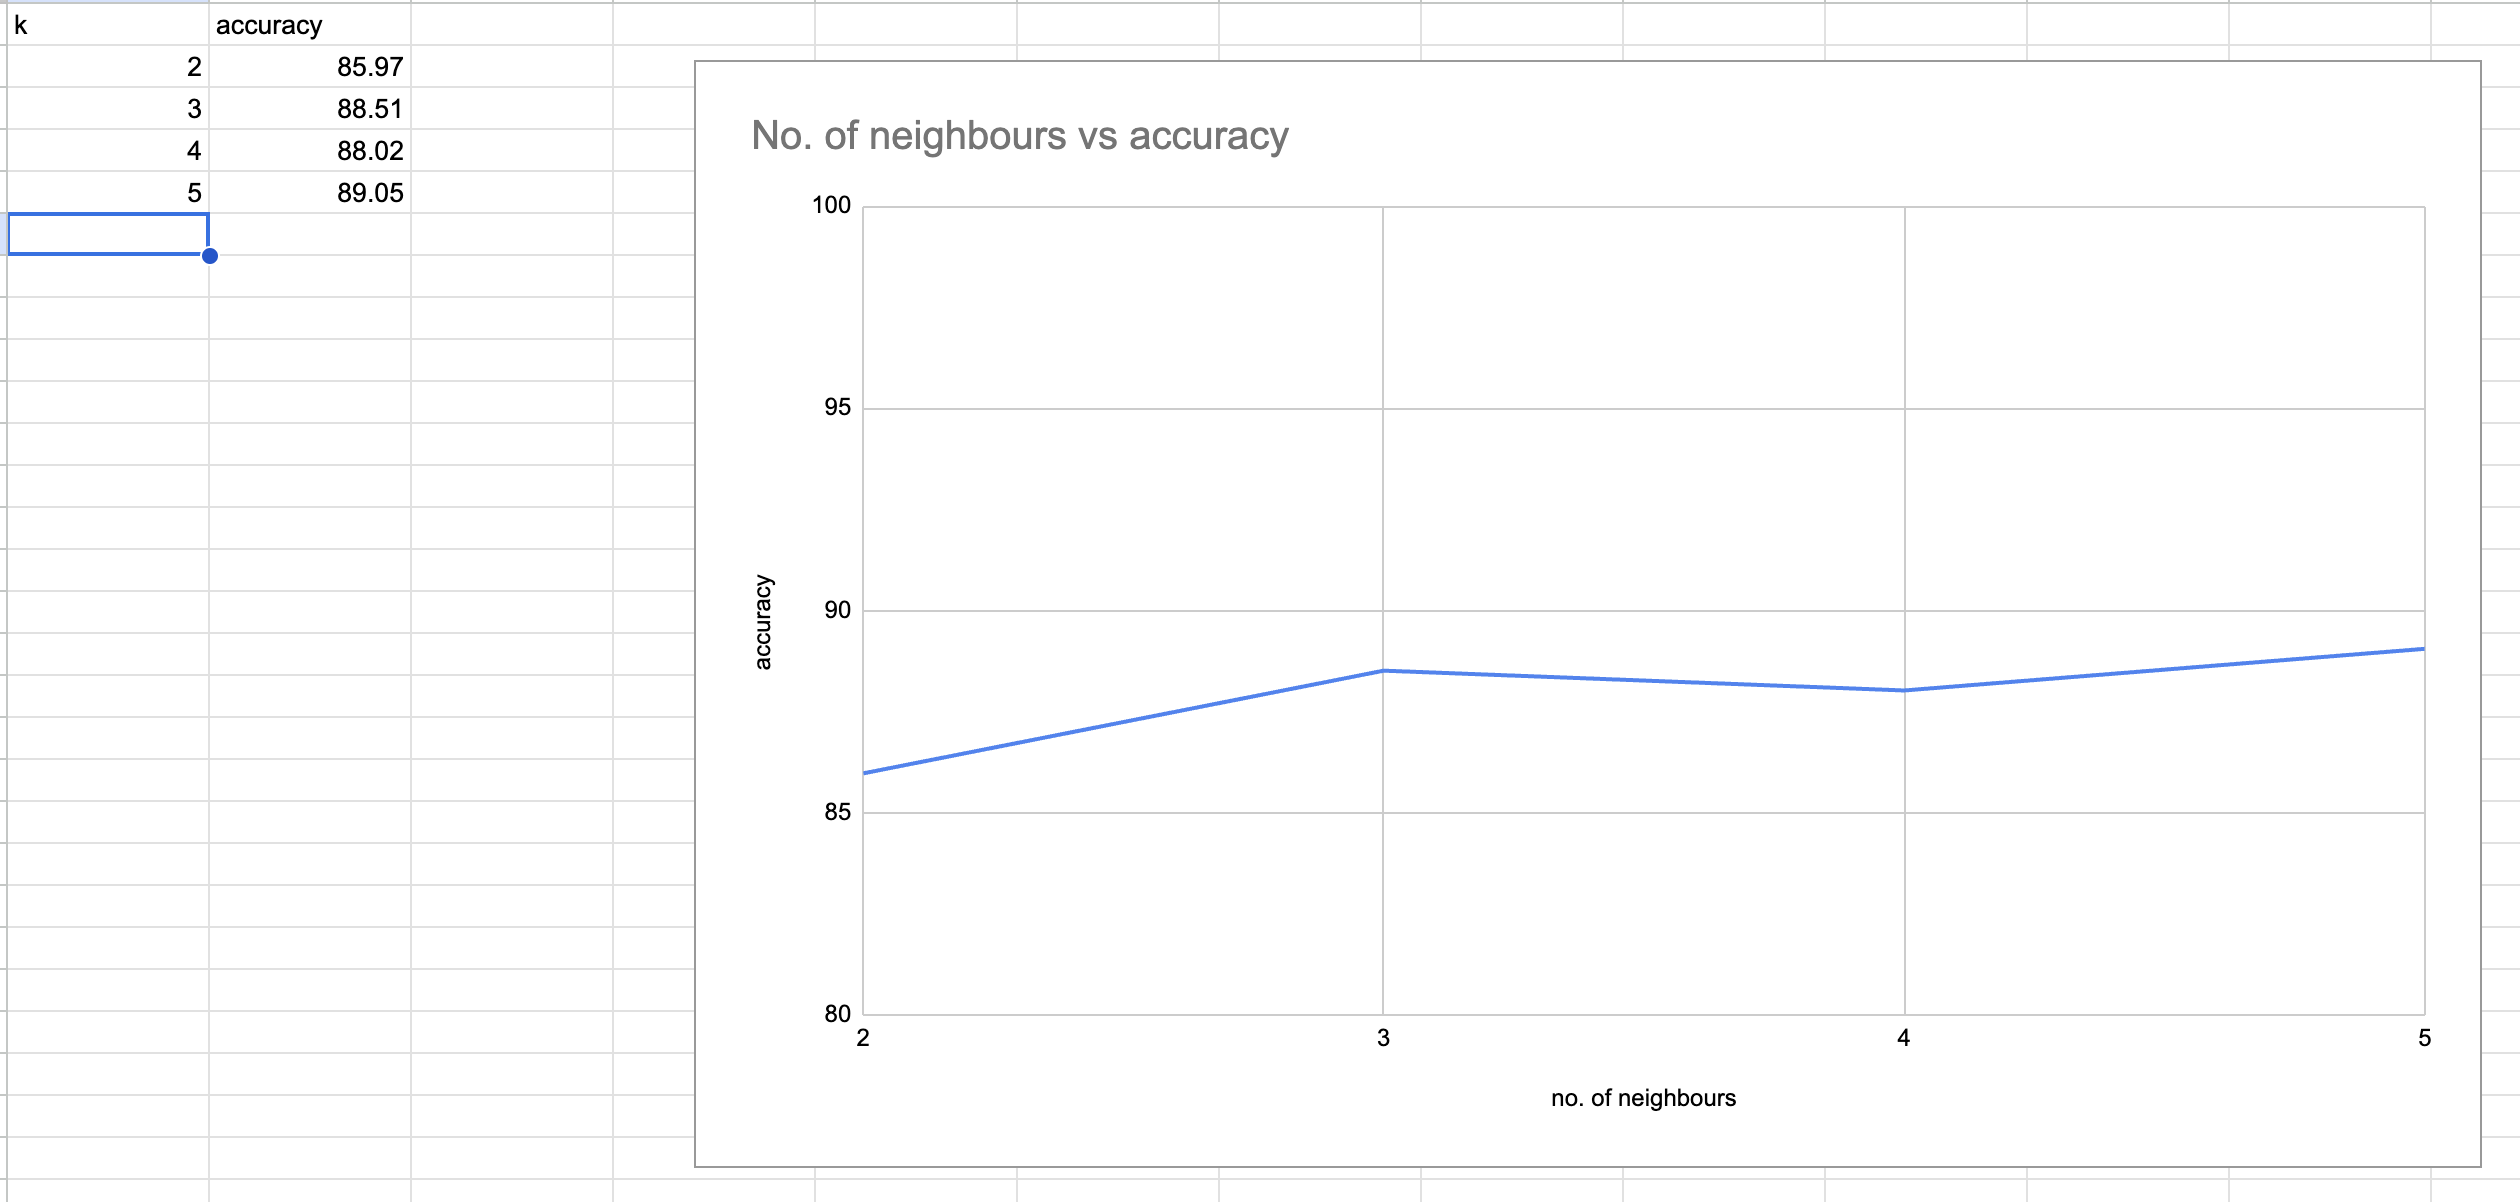

Here we are looking at the effect of k on the accuracy of the k-nearest neighbours model. We can see there is a general upward trend, with a slight exception, in the accuracy with increasing k.

### ANN

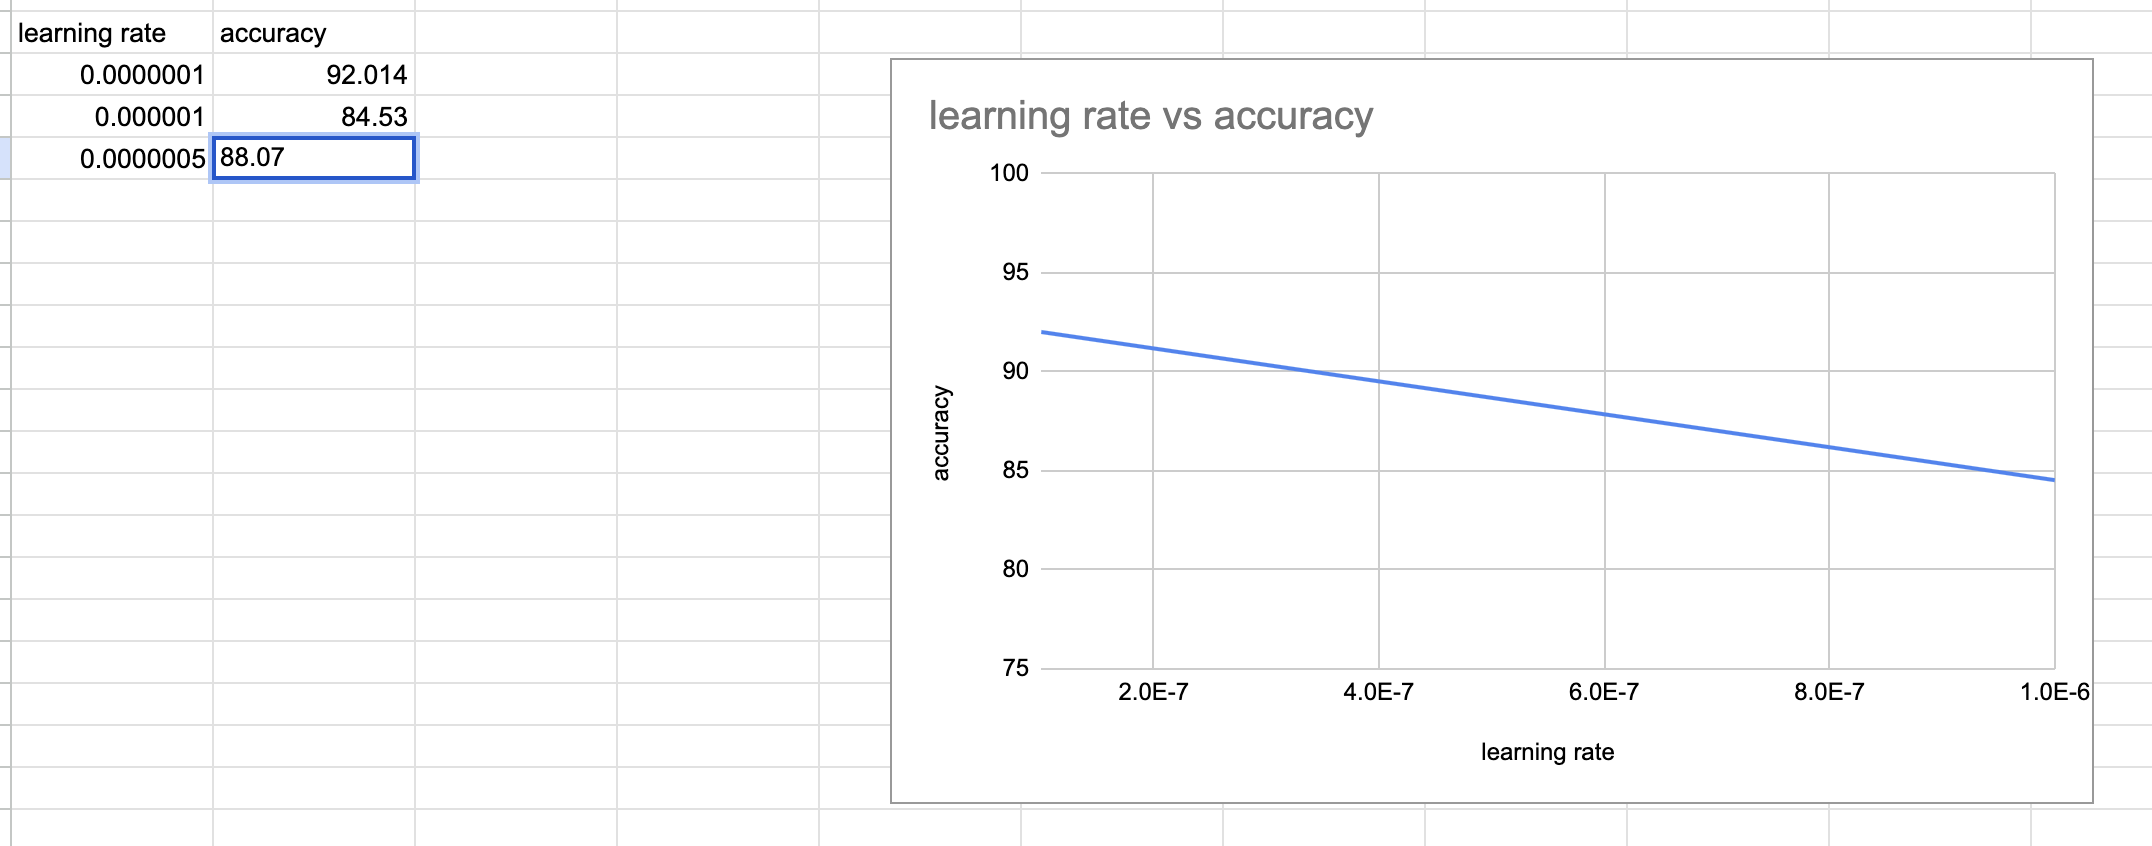

here we can see the effect of the learning rate on the accuracy. There is clear trend that with increasing learning rate there is a decrease in accuracy. The trade-off here is accuracy versus time.

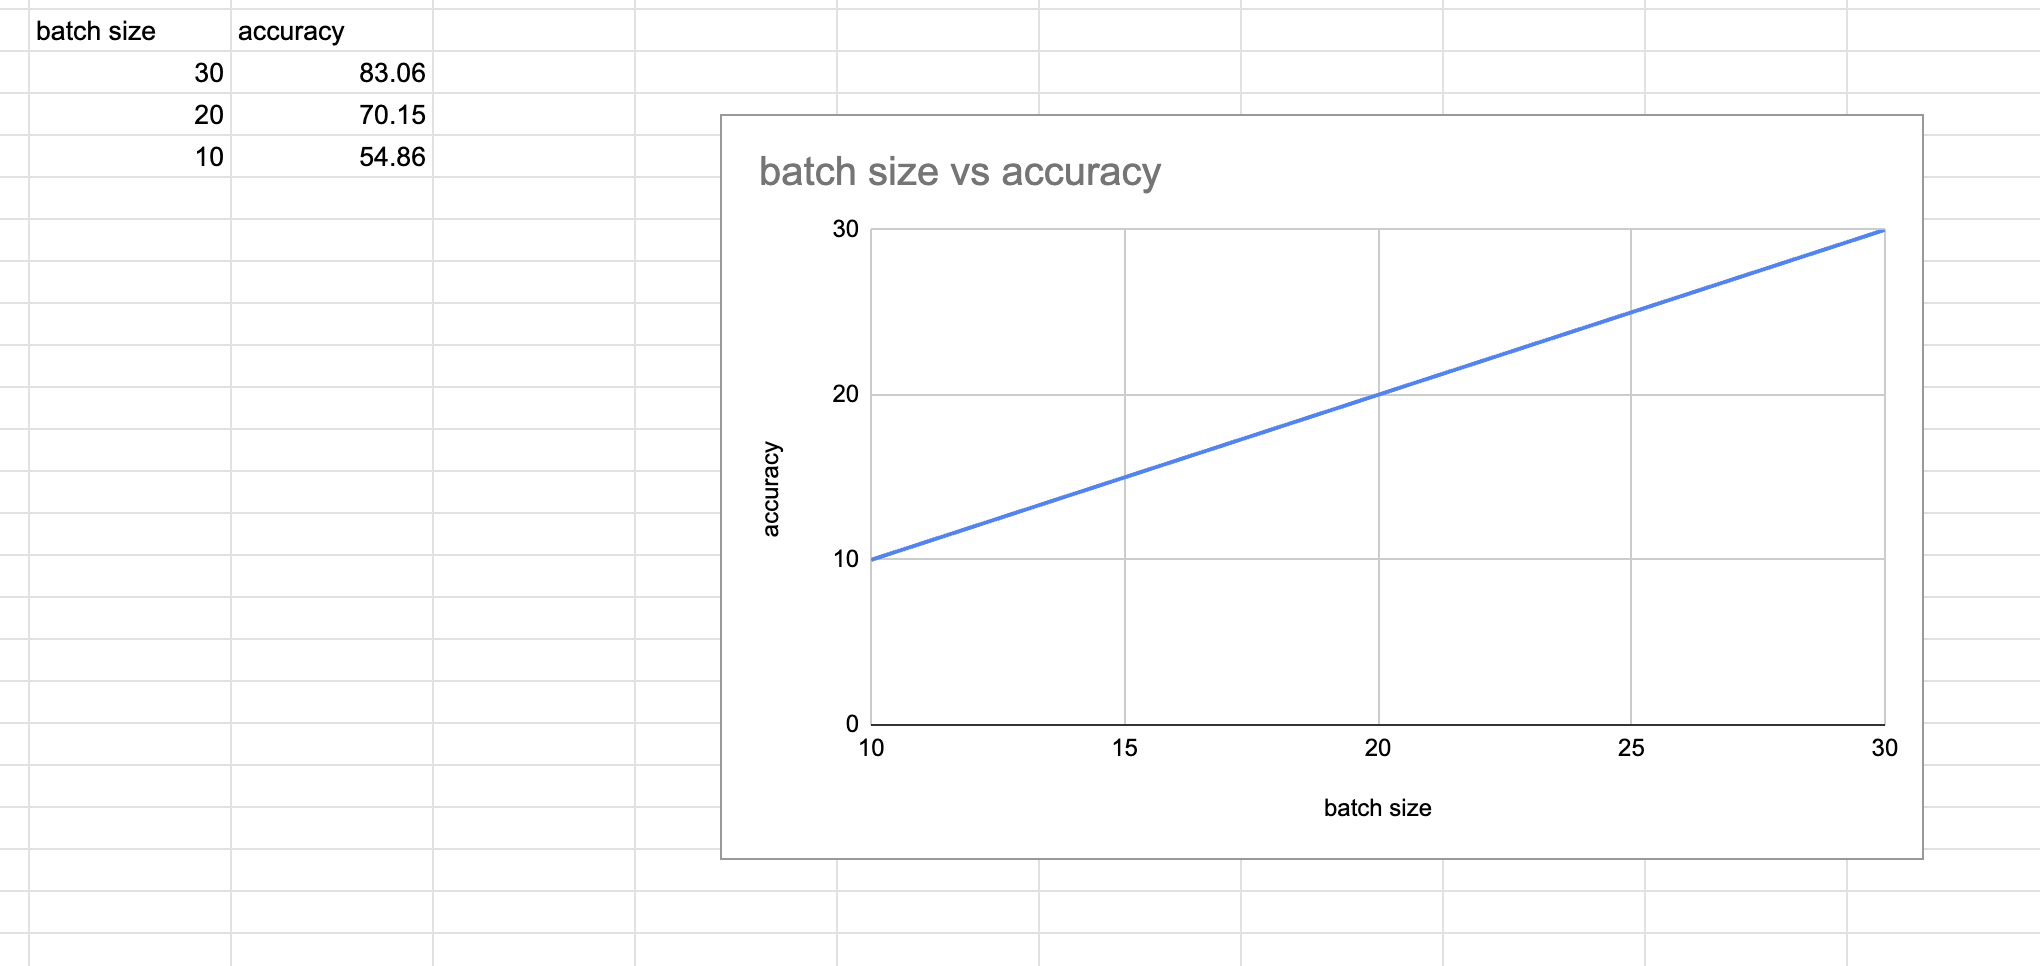

Here we are looking at the effect of batch size on accuracy, as we can see an increasing batch size leads to an increase in accuracy.

### Random Forest

***Random Forest*** for regression and classification of CO2 emissions has the best accuracy for 20 trees, a maximum of 20 features and a maximum tree depth of 45.

This optimal set of values gives us least MSE and highest accuracy, and this conclusion was obtained from the following graphed variations. The algorithm gives high accuracy for regression as well as classification.

91.1% accuracy for prediction using only fuel based indicators and 95.2% accuracy for classification of the CO2 labels using all the input features. Slight decline in accuracy implies that the model's learning is mostly dependent on the fuel type and consumption parameters.

Varying different parameters and observing its influence on the accuracy of the algorithm:
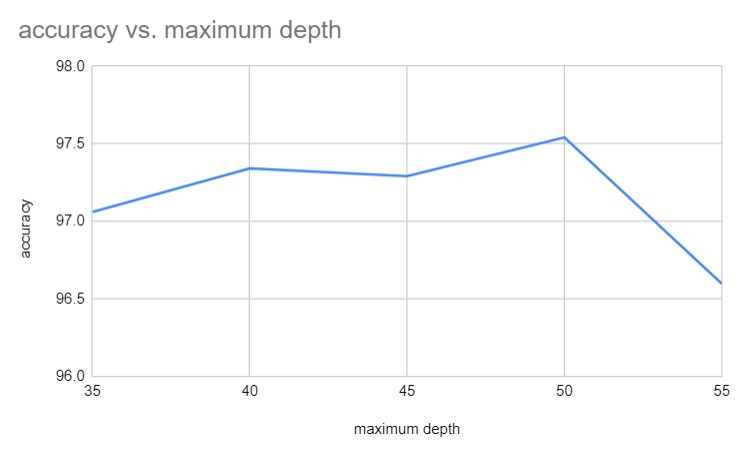

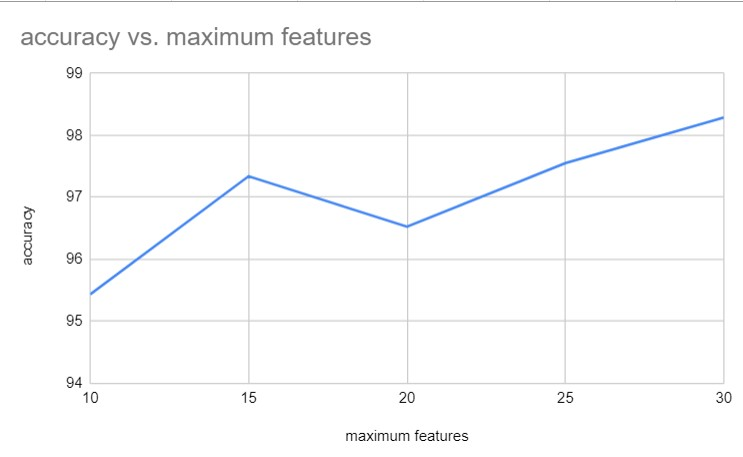

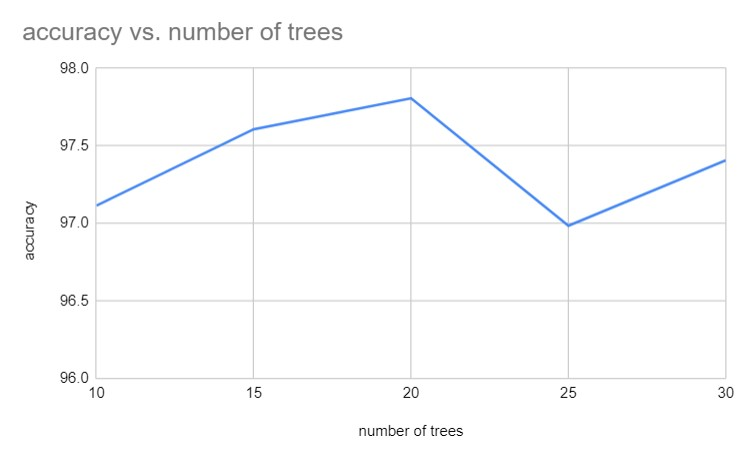

### XGBoost

***XGBoost*** for regression prediction of the CO2 emissions has the best accuracy with a 0.5 learning rate, 300 estimators and maximum tree depth being limited to 8. This optimal set of values gives us least MSE and highest accuracy, and this conclusion was obtained from the following graphed variations.

Best results obtained:
MSE: 655.82 implies RMSE: 25.6
Accuracy against error rate: 91.32%

Keeping the other hyperparameters constant, we graph MSE and accuracy variation with 1. maximum depth and 2. learning rate:

1.
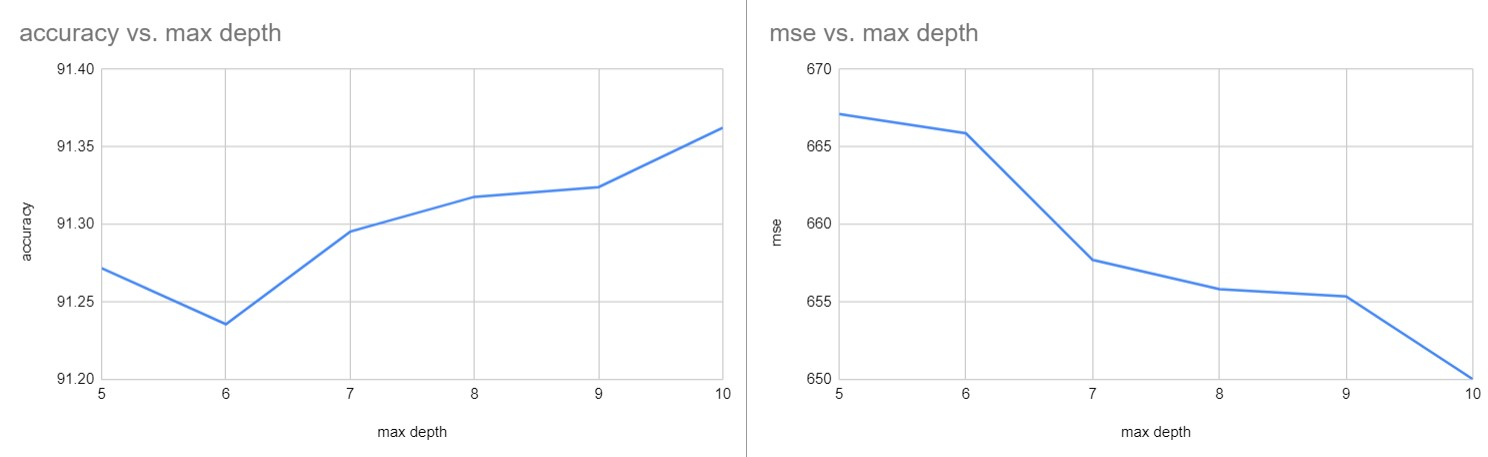

2.
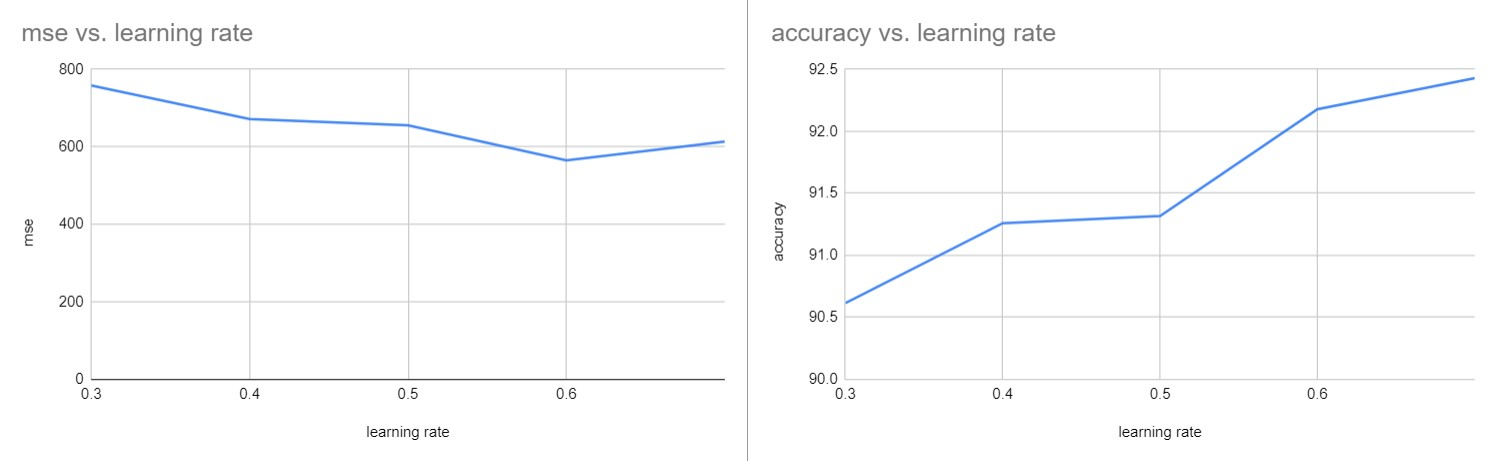

Independent implementations of XGBoost suffer from the lack of optimization techniques available to an XGBoost model built into the library. XGBoost was found to be highly time consuming without the necessary trade-off with accuracy.

When only fuel-consumption factors were considered in the input feature space, there was a slight but noticeable decline in accuracy as compared to when all the features were used in the input space. This shows that for this algorithm learning to predict CO2 emissions largely depend on the fuel type and consumption factors.

## Conclusion

Insights delivered: Random Forest worked the best for both regression prediction of CO2 emissions as well as classification based on safety levels of CO2. Random Forest worked the best more consistently for multiple runs in comparison to other models.

Compact Model cars and Fuel Type X were found by the algorithm to have the least concerning levels of CO2 emissions among all car models and fuel types.

Using the Correlation Heatmap, we managed to remove completely correlated features which boosted computation time and efficiency.

In almost all of the algorithms used, when fuel consumption parameters were solely used for training, the accuraacy only decreased slightly in comparison to when all the input features available were used in training. This indicates that most of the models base their learning of the dataset more heavily on the fuel type and consumption parameters.


# **_7. References_**

1.   KNN Reference Paper
  *   Uddin, S., Haque, I., Lu, H. et al. Comparative performance analysis of K-nearest neighbour (KNN) algorithm and its different variants for disease prediction. Sci Rep 12, 6256 (2022). https://doi.org/10.1038/s41598-022-10358-x


2.   XGBoost Reference Paper
  *   Tianqi Chen and Carlos Guestrin. 2016. XGBoost: A Scalable Tree Boosting System. In Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (KDD '16). Association for Computing Machinery, New York, NY, USA, 785–794. https://doi.org/10.1145/2939672.2939785



